# Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('../datasets/mlb_pitch_stats_19_21_cleaned.csv', index_col = 'player_id')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(df.shape)
df.head()

(704, 94)


,last_name,first_name,year,age,ip,bf,ab,h,k%,bb%,...,cu_vb,cu_brk,cu_velo_range,2seam%,2seam_velo,2seam_spinrate,2seam_hb,2seam_vb,2seam_brk,2seam_velo_range
player_id,,,,,,,,,,,,,,,,,,,,,
425794,Wainwright,Adam,2021,40,196.1,784,725,157,21.6,5.9,...,-31.0,9.5,1.6,59.2,87.5,2297,-3.9,-25.0,14.3,2.7
425844,Greinke,Zack,2021,38,164.2,670,626,157,17.0,5.2,...,NaN,NaN,NaN,45.9,89.0,2225,-2.7,-18.6,16.7,1.3
429722,Santana,Ervin,2021,39,61.1,255,232,58,18.8,7.5,...,NaN,NaN,NaN,45.3,93.4,2179,-4.5,-17.2,15.0,1.3
433589,Petit,Yusmeiro,2021,37,72.1,290,273,63,12.4,4.1,...,-21.1,17.3,1.3,68.4,86.5,2134,-3.7,-18.8,18.3,2.1
445276,Jansen,Kenley,2021,34,61.2,250,210,33,29.6,13.6,...,-14.4,19.2,1.9,84.5,93.0,2578,2.7,-13.6,19.6,2.0


# Data Cleaning

### Nulls and dtypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 425794 to 676606
Data columns (total 94 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   last_name         704 non-null    object 
 1    first_name       704 non-null    object 
 2   year              704 non-null    int64  
 3   age               704 non-null    int64  
 4   ip                704 non-null    float64
 5   bf                704 non-null    int64  
 6   ab                704 non-null    int64  
 7   h                 704 non-null    int64  
 8   k%                704 non-null    float64
 9   bb%               704 non-null    float64
 10  ba                704 non-null    float64
 11  slg%              704 non-null    float64
 12  obp%              704 non-null    float64
 13  ops               704 non-null    float64
 14  earned_runs       704 non-null    int64  
 15  era               704 non-null    float64
 16  qual_start        704 non-null    in

### Fill Nulls with 999 (subject to change)

In [4]:
#df.fillna(value = 0, inplace = True)
df[df.columns[df.isnull().any()]].isnull().sum()

4seam%               26
4seam_velo           26
4seam_spinrate       26
4seam_hb             26
4seam_vb             26
4seam_brk            26
4seam_velo_range     30
sl%                 165
sl_velo             165
sl_spinrate         165
sl_hb               165
sl_vb               165
sl_brk              165
sl_velo_range       168
ch%                 134
ch_velo             134
ch_spinrate         134
ch_hb               134
ch_vb               134
ch_brk              134
ch_velo_range       145
cb%                 210
cb_velo             210
cb_spinrate         211
cb_hb               210
cb_vb               210
cb_brk              210
cb_velo_range       215
cu%                 473
cu_velo             473
cu_spinrate         473
cu_hb               473
cu_vb               473
cu_brk              473
cu_velo_range       478
dtype: int64

In [5]:
df['xops'] = df['xobp'] + df['xslg']

### Split Features in DataFrame by Category

In [6]:
stats = df.iloc[:, :51].copy()
print('stats:', stats.shape)

pitch = df.iloc[:, 51:].copy()
print('pitch:', pitch.shape)


metrics = df.iloc[:, 4:26].copy()
print('metrics:', metrics.shape)

adv_metrics = df.iloc[:, 27:49].copy()
print('adv_metrics:', adv_metrics.shape)

velo = df[['4seam_velo', 'sl_velo', 
           'ch_velo', 'cb_velo', 
           'cu_velo', '2seam_velo', 
           '4seam_velo_range', 'sl_velo_range', 
           'ch_velo_range', 'cb_velo_range', 
           'cu_velo_range', '2seam_velo_range']].copy()
print('velo:', velo.shape)

spin = df[['4seam_spinrate', 'sl_spinrate', 
           'ch_spinrate', 'cb_spinrate', 
           'cu_spinrate', '2seam_spinrate', 
           '4seam_hb', '4seam_vb', 
           'sl_hb', 'sl_vb', 'ch_hb', 
           'ch_vb', 'cb_hb', 'cb_vb', 
           'cu_vb', 'cu_hb', '2seam_hb', 
           '2seam_vb']].copy()
print('spin:', spin.shape)

stats: (704, 51)
pitch: (704, 44)
metrics: (704, 22)
adv_metrics: (704, 22)
velo: (704, 12)
spin: (704, 18)


In [7]:
df.head()

,last_name,first_name,year,age,ip,bf,ab,h,k%,bb%,...,cu_brk,cu_velo_range,2seam%,2seam_velo,2seam_spinrate,2seam_hb,2seam_vb,2seam_brk,2seam_velo_range,xops
player_id,,,,,,,,,,,,,,,,,,,,,
425794,Wainwright,Adam,2021,40,196.1,784,725,157,21.6,5.9,...,9.5,1.6,59.2,87.5,2297,-3.9,-25.0,14.3,2.7,0.681
425844,Greinke,Zack,2021,38,164.2,670,626,157,17.0,5.2,...,NaN,NaN,45.9,89.0,2225,-2.7,-18.6,16.7,1.3,0.725
429722,Santana,Ervin,2021,39,61.1,255,232,58,18.8,7.5,...,NaN,NaN,45.3,93.4,2179,-4.5,-17.2,15.0,1.3,0.851
433589,Petit,Yusmeiro,2021,37,72.1,290,273,63,12.4,4.1,...,17.3,1.3,68.4,86.5,2134,-3.7,-18.8,18.3,2.1,0.722
445276,Jansen,Kenley,2021,34,61.2,250,210,33,29.6,13.6,...,19.2,1.9,84.5,93.0,2578,2.7,-13.6,19.6,2.0,0.570


In [8]:
df.loc[445276]

,last_name,first_name,year,age,ip,bf,ab,h,k%,bb%,...,cu_brk,cu_velo_range,2seam%,2seam_velo,2seam_spinrate,2seam_hb,2seam_vb,2seam_brk,2seam_velo_range,xops
player_id,,,,,,,,,,,,,,,,,,,,,
445276,Jansen,Kenley,2021,34,61.2,250,210,33,29.6,13.6,...,19.2,1.9,84.5,93.0,2578,2.7,-13.6,19.6,2.0,0.570
445276,Jansen,Kenley,2019,32,63.0,263,240,51,30.4,6.1,...,16.1,1.4,87.7,91.9,2522,4.5,-16.5,16.6,1.5,0.593


In [9]:
velo.cu_velo.value_counts(ascending = True)

89.6    1
94.1    1
91.1    1
91.8    1
84.7    1
       ..
86.7    5
85.9    6
87.0    6
87.2    7
87.5    8
Name: cu_velo, Length: 95, dtype: int64

# EDA

In [10]:
stats.describe()

,year,age,ip,bf,ab,h,k%,bb%,ba,slg%,...,pitch_count,z_contact%,in_zone%,edge%,whiff%,swing%,gb%,fb%,ld%,po%
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,...,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,2019.960227,29.143466,93.093750,395.213068,355.183239,86.883523,23.836506,8.471449,0.242679,0.411088,...,1544.998580,81.160369,48.444460,42.489062,26.104261,47.646165,44.261932,24.416193,24.117330,7.201989
std,0.999919,3.643133,45.056331,186.373270,171.995755,44.711123,5.946785,2.717227,0.036714,0.074874,...,721.852951,4.290040,3.326992,2.025754,5.191700,3.018032,8.061811,5.463727,3.339979,2.860059
min,2019.000000,21.000000,42.200000,200.000000,166.000000,24.000000,10.900000,2.000000,0.123000,0.166000,...,626.000000,61.700000,37.300000,36.700000,13.600000,37.600000,18.900000,8.200000,12.600000,0.600000
25%,2019.000000,26.000000,58.000000,245.000000,219.000000,51.000000,19.800000,6.500000,0.218000,0.357000,...,966.750000,78.600000,46.400000,41.100000,22.400000,45.700000,38.600000,20.700000,22.100000,5.200000
50%,2019.000000,29.000000,72.200000,310.000000,276.500000,70.000000,23.000000,8.200000,0.242000,0.412000,...,1225.500000,81.500000,48.400000,42.500000,25.700000,47.700000,44.100000,24.350000,24.200000,6.900000
75%,2021.000000,32.000000,124.125000,532.250000,482.750000,121.000000,27.325000,10.000000,0.268000,0.457000,...,2058.500000,84.200000,50.900000,43.800000,29.400000,49.500000,49.500000,28.200000,26.200000,8.900000
max,2021.000000,42.000000,223.000000,911.000000,810.000000,227.000000,47.800000,18.700000,0.351000,0.746000,...,3687.000000,93.300000,59.700000,48.400000,44.900000,59.200000,76.700000,40.700000,36.000000,18.900000


In [11]:
pitch.describe()

,n_pitches,4seam%,4seam_velo,4seam_spinrate,4seam_hb,4seam_vb,4seam_brk,4seam_velo_range,sl%,sl_velo,...,cu_brk,cu_velo_range,2seam%,2seam_velo,2seam_spinrate,2seam_hb,2seam_vb,2seam_brk,2seam_velo_range,xops
count,704.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,674.000000,539.000000,539.000000,...,231.000000,226.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,1535.318182,36.817994,93.378024,2265.525074,-3.192330,-16.280973,17.565044,1.365282,24.141187,84.570501,...,9.361039,1.518142,58.658665,92.930398,2252.684659,-3.555682,-18.686080,17.170455,1.704688,0.712168
std,715.237987,19.443474,2.502336,152.604562,7.588867,3.760092,2.404821,0.236830,13.520706,3.057346,...,2.955326,0.274677,12.378798,2.683252,160.344943,8.939725,5.087773,2.627864,0.709611,0.089295
min,626.000000,0.100000,82.600000,1776.000000,-16.800000,-54.200000,6.300000,0.800000,0.000000,71.700000,...,2.700000,0.900000,12.600000,82.600000,1755.000000,-19.200000,-53.600000,7.900000,0.800000,0.425000
25%,961.500000,22.600000,92.000000,2157.250000,-8.900000,-17.700000,16.400000,1.200000,14.650000,82.800000,...,7.450000,1.325000,50.875000,91.300000,2143.750000,-10.400000,-21.500000,15.700000,1.300000,0.652750
50%,1225.500000,39.700000,93.500000,2262.000000,-5.700000,-15.800000,18.000000,1.300000,23.200000,84.900000,...,8.900000,1.500000,57.900000,93.100000,2251.500000,-6.100000,-18.000000,17.700000,1.500000,0.710000
75%,2057.250000,50.900000,94.975000,2370.000000,3.050000,-14.025000,19.200000,1.500000,31.300000,86.550000,...,10.700000,1.700000,65.900000,94.700000,2362.250000,3.825000,-15.200000,19.000000,1.900000,0.771000
max,3686.000000,90.100000,100.600000,2783.000000,18.800000,-9.900000,23.000000,2.500000,87.400000,92.400000,...,21.900000,2.800000,100.000000,100.200000,2792.000000,18.600000,-10.200000,23.000000,5.300000,1.119000


In [12]:
metrics.describe()

,ip,bf,ab,h,k%,bb%,ba,slg%,obp%,ops,...,qual_start,cg,xba,xslg,woba,xwoba,xobp,wobacon,xwobacon,bacon
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,...,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,93.093750,395.213068,355.183239,86.883523,23.836506,8.471449,0.242679,0.411088,0.312443,0.723527,...,4.548295,0.125000,0.237861,0.401317,0.310143,0.310074,0.310851,0.368653,0.368267,0.327699
std,45.056331,186.373270,171.995755,44.711123,5.946785,2.717227,0.036714,0.074874,0.037304,0.103120,...,6.066530,0.421675,0.031215,0.064935,0.039754,0.035008,0.033054,0.046394,0.034744,0.036725
min,42.200000,200.000000,166.000000,24.000000,10.900000,2.000000,0.123000,0.166000,0.160000,0.402000,...,0.000000,0.000000,0.145000,0.230000,0.174000,0.190000,0.179000,0.214000,0.254000,0.216000
25%,58.000000,245.000000,219.000000,51.000000,19.800000,6.500000,0.218000,0.357000,0.286000,0.648500,...,0.000000,0.000000,0.217000,0.357000,0.282000,0.288000,0.289750,0.336000,0.344000,0.304000
50%,72.200000,310.000000,276.500000,70.000000,23.000000,8.200000,0.242000,0.412000,0.314000,0.722500,...,1.000000,0.000000,0.239000,0.400000,0.311000,0.310000,0.311500,0.369000,0.368000,0.327500
75%,124.125000,532.250000,482.750000,121.000000,27.325000,10.000000,0.268000,0.457000,0.338000,0.788000,...,8.000000,0.000000,0.259000,0.446000,0.336000,0.333000,0.334000,0.397250,0.393000,0.353000
max,223.000000,911.000000,810.000000,227.000000,47.800000,18.700000,0.351000,0.746000,0.417000,1.157000,...,26.000000,3.000000,0.339000,0.717000,0.464000,0.452000,0.402000,0.584000,0.503000,0.500000


In [13]:
adv_metrics.describe()

,ev_avg,la_avg,sweet_spot%,barrel%,solid_contact%,poor_weak%,hard_hit%,z_swing%,z_swing_miss%,oz_swing%,...,out_zone%,pitch_count,z_contact%,in_zone%,edge%,whiff%,swing%,gb%,fb%,ld%
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,...,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,88.692756,12.521733,33.076563,7.446733,5.942188,4.046449,37.494318,67.768324,18.241903,28.662642,...,51.555540,1544.998580,81.160369,48.444460,42.489062,26.104261,47.646165,44.261932,24.416193,24.117330
std,1.539205,5.345587,4.102028,2.300959,1.775035,1.856974,4.836607,3.740308,4.394370,3.460484,...,3.326992,721.852951,4.290040,3.326992,2.025754,5.191700,3.018032,8.061811,5.463727,3.339979
min,83.400000,-9.300000,16.400000,0.700000,1.600000,0.000000,23.500000,50.600000,5.500000,20.100000,...,40.300000,626.000000,61.700000,37.300000,36.700000,13.600000,37.600000,18.900000,8.200000,12.600000
25%,87.700000,9.200000,30.700000,5.900000,4.800000,2.800000,34.300000,65.400000,15.200000,26.200000,...,49.100000,966.750000,78.600000,46.400000,41.100000,22.400000,45.700000,38.600000,20.700000,22.100000
50%,88.700000,12.500000,33.200000,7.300000,5.900000,3.900000,37.600000,67.800000,17.800000,28.400000,...,51.600000,1225.500000,81.500000,48.400000,42.500000,25.700000,47.700000,44.100000,24.350000,24.200000
75%,89.700000,16.000000,35.625000,8.900000,7.100000,5.000000,40.500000,70.200000,20.825000,31.000000,...,53.600000,2058.500000,84.200000,50.900000,43.800000,29.400000,49.500000,49.500000,28.200000,26.200000
max,93.100000,30.200000,47.800000,16.800000,13.000000,12.700000,55.600000,81.000000,37.800000,40.100000,...,62.700000,3687.000000,93.300000,59.700000,48.400000,44.900000,59.200000,76.700000,40.700000,36.000000


In [14]:
velo.describe()

,4seam_velo,sl_velo,ch_velo,cb_velo,cu_velo,2seam_velo,4seam_velo_range,sl_velo_range,ch_velo_range,cb_velo_range,cu_velo_range,2seam_velo_range
count,678.000000,539.000000,570.000000,494.000000,231.000000,704.000000,674.000000,536.000000,559.000000,489.000000,226.000000,704.000000
mean,93.378024,84.570501,85.500175,78.746559,88.413853,92.930398,1.365282,1.666978,1.491055,1.655419,1.518142,1.704688
std,2.502336,3.057346,3.161958,3.366531,2.673685,2.683252,0.236830,0.330973,0.263201,0.357324,0.274677,0.709611
min,82.600000,71.700000,69.700000,64.700000,81.900000,82.600000,0.800000,1.000000,0.900000,1.000000,0.900000,0.800000
25%,92.000000,82.800000,83.900000,76.700000,86.600000,91.300000,1.200000,1.400000,1.300000,1.400000,1.325000,1.300000
50%,93.500000,84.900000,85.700000,79.000000,88.100000,93.100000,1.300000,1.600000,1.400000,1.600000,1.500000,1.500000
75%,94.975000,86.550000,87.500000,81.075000,90.200000,94.700000,1.500000,1.800000,1.600000,1.800000,1.700000,1.900000
max,100.600000,92.400000,92.600000,87.200000,100.200000,100.200000,2.500000,3.600000,3.000000,4.300000,2.800000,5.300000


In [15]:
spin.describe()

,4seam_spinrate,sl_spinrate,ch_spinrate,cb_spinrate,cu_spinrate,2seam_spinrate,4seam_hb,4seam_vb,sl_hb,sl_vb,ch_hb,ch_vb,cb_hb,cb_vb,cu_vb,cu_hb,2seam_hb,2seam_vb
count,678.000000,539.000000,570.000000,493.000000,231.000000,704.000000,678.000000,678.000000,539.000000,539.000000,570.000000,570.00000,494.000000,494.000000,231.000000,231.000000,704.000000,704.000000
mean,2265.525074,2404.461967,1773.908772,2468.730223,2328.939394,2252.684659,-3.192330,-16.280973,2.866976,-37.047124,-5.271579,-30.17193,3.976923,-53.990688,-27.073160,1.321212,-3.555682,-18.686080
std,152.604562,235.855273,254.889739,273.894768,213.184867,160.344943,7.588867,3.760092,6.715959,5.562872,12.678846,5.07977,8.561257,7.126560,4.815425,3.075362,8.939725,5.087773
min,1776.000000,1634.000000,1023.000000,1786.000000,1329.000000,1755.000000,-16.800000,-54.200000,-22.700000,-60.700000,-20.600000,-55.20000,-26.000000,-74.200000,-41.800000,-14.400000,-19.200000,-53.600000
25%,2157.250000,2245.000000,1597.000000,2277.000000,2190.500000,2143.750000,-8.900000,-17.700000,-1.000000,-40.450000,-14.500000,-33.10000,-3.300000,-58.775000,-30.100000,-1.050000,-10.400000,-21.500000
50%,2262.000000,2387.000000,1730.500000,2468.000000,2314.000000,2251.500000,-5.700000,-15.800000,3.500000,-36.900000,-12.050000,-29.60000,6.300000,-54.100000,-27.200000,1.800000,-6.100000,-18.000000
75%,2370.000000,2537.500000,1942.000000,2651.000000,2479.000000,2362.250000,3.050000,-14.025000,6.300000,-33.300000,10.900000,-26.90000,10.200000,-49.400000,-24.000000,3.450000,3.825000,-15.200000
max,2783.000000,3270.000000,2819.000000,3305.000000,2928.000000,2792.000000,18.800000,-9.900000,22.800000,-24.600000,20.400000,-11.90000,22.000000,-33.900000,-8.400000,7.300000,18.600000,-10.200000


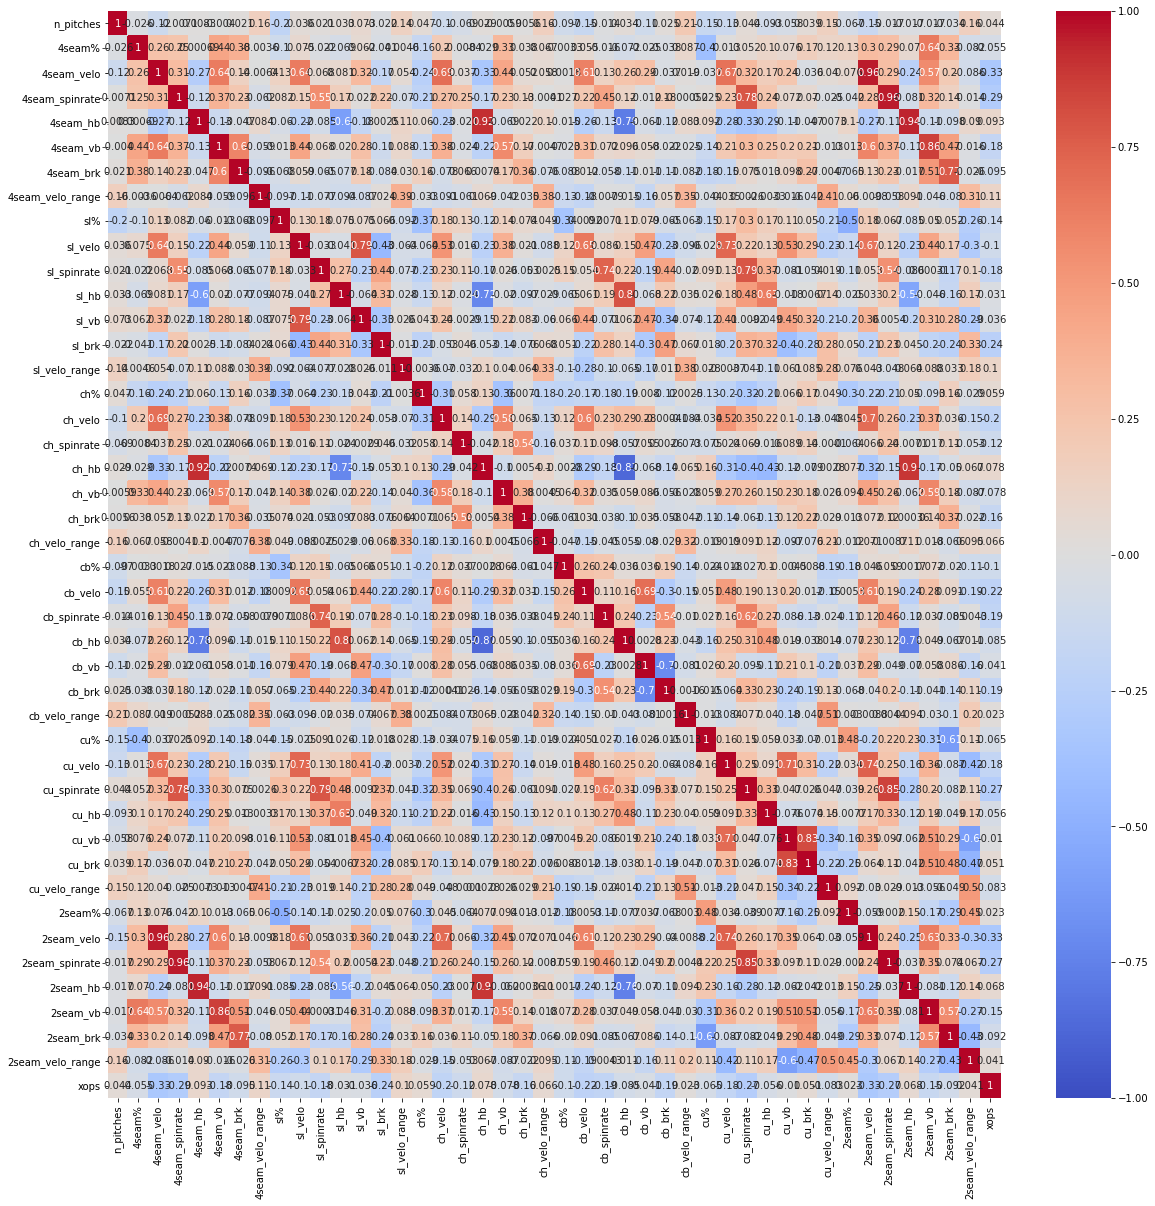

In [16]:
plt.figure(figsize = (20, 20))
sns.heatmap(pitch.corr(), annot = True, 
            vmin = -1,
            vmax = 1, 
            cmap = 'coolwarm');
#plt.title('', 
#          fontsize = 14, fontweight = 'bold', pad = 12);

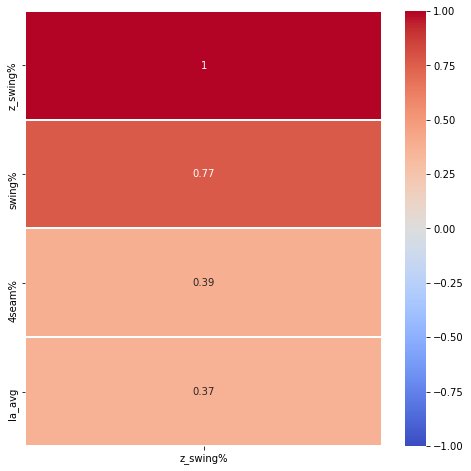

In [17]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr()[['z_swing%']][df.corr()['z_swing%'] > .35].sort_values('z_swing%', 
                                                                            ascending = False),
            annot = True,
            linewidths = 1,
            vmin = -1,
            vmax = 1, 
            cmap = 'coolwarm');

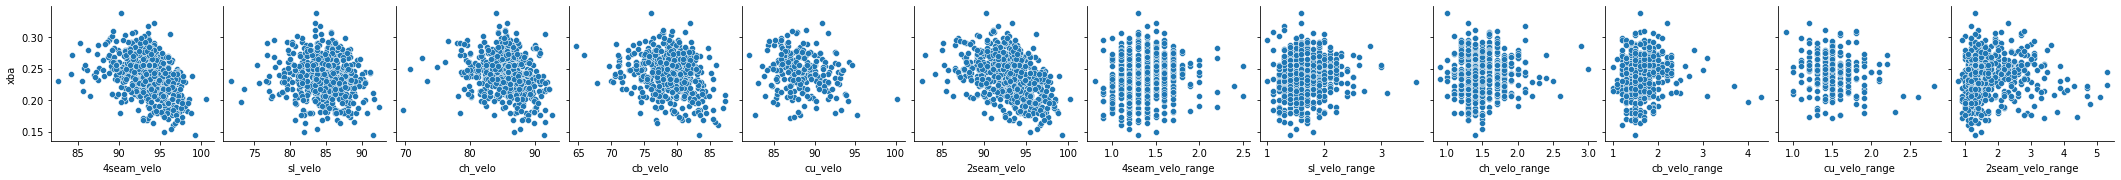

In [18]:
sns.pairplot(data = df, x_vars = velo, 
             y_vars = ['xba']);

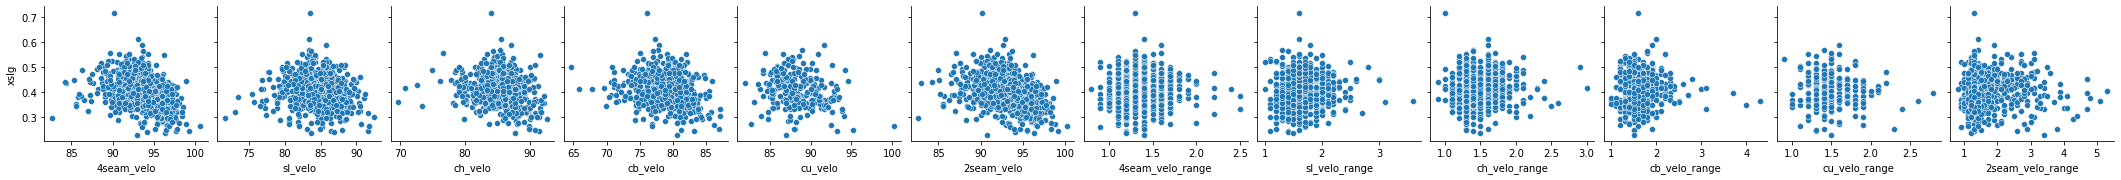

In [19]:
sns.pairplot(data = df, x_vars = velo, 
             y_vars = ['xslg']);

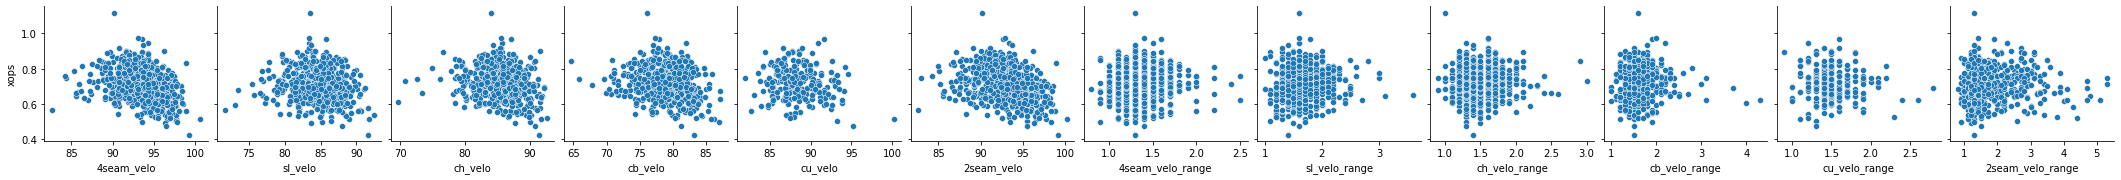

In [20]:
sns.pairplot(data = df, x_vars = velo, 
             y_vars = ['xops']);

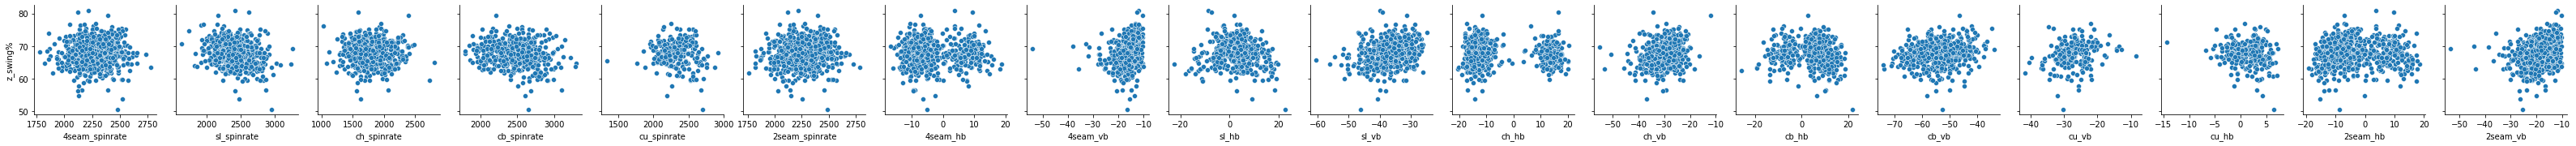

In [21]:
sns.pairplot(data = df, x_vars = spin, 
             y_vars = ['z_swing%']);

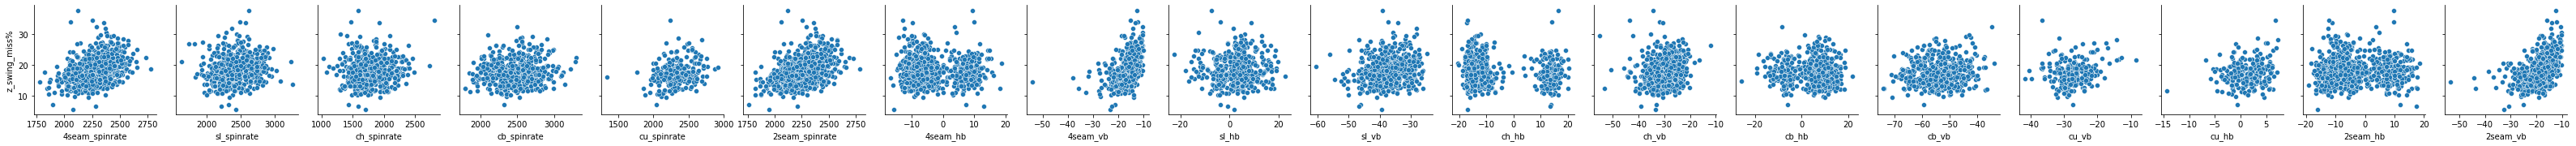

In [22]:
sns.pairplot(data = df, x_vars = spin, 
             y_vars = ['z_swing_miss%']);

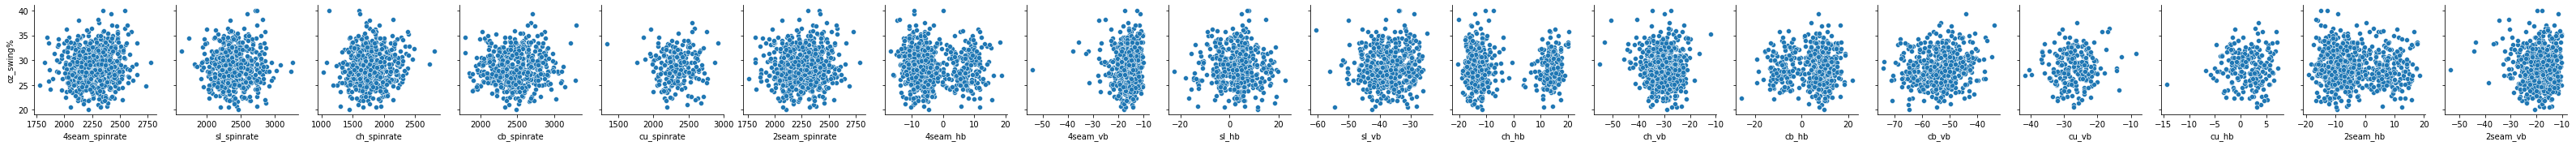

In [23]:
sns.pairplot(data = df, x_vars = spin, 
             y_vars = ['oz_swing%']);

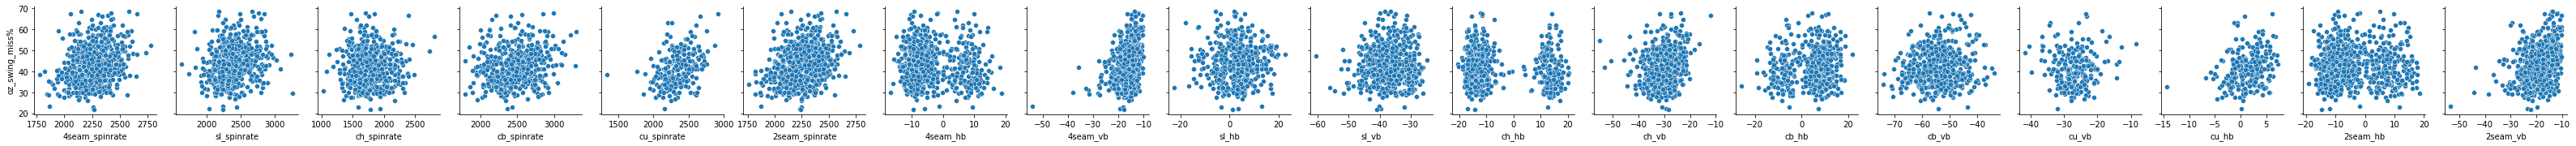

In [24]:
sns.pairplot(data = df, x_vars = spin, 
             y_vars = ['oz_swing_miss%']);

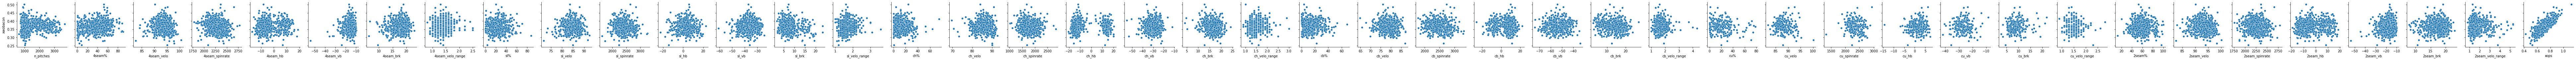

In [25]:
sns.pairplot(data = df, x_vars = pitch, 
             y_vars = ['xwobacon']);

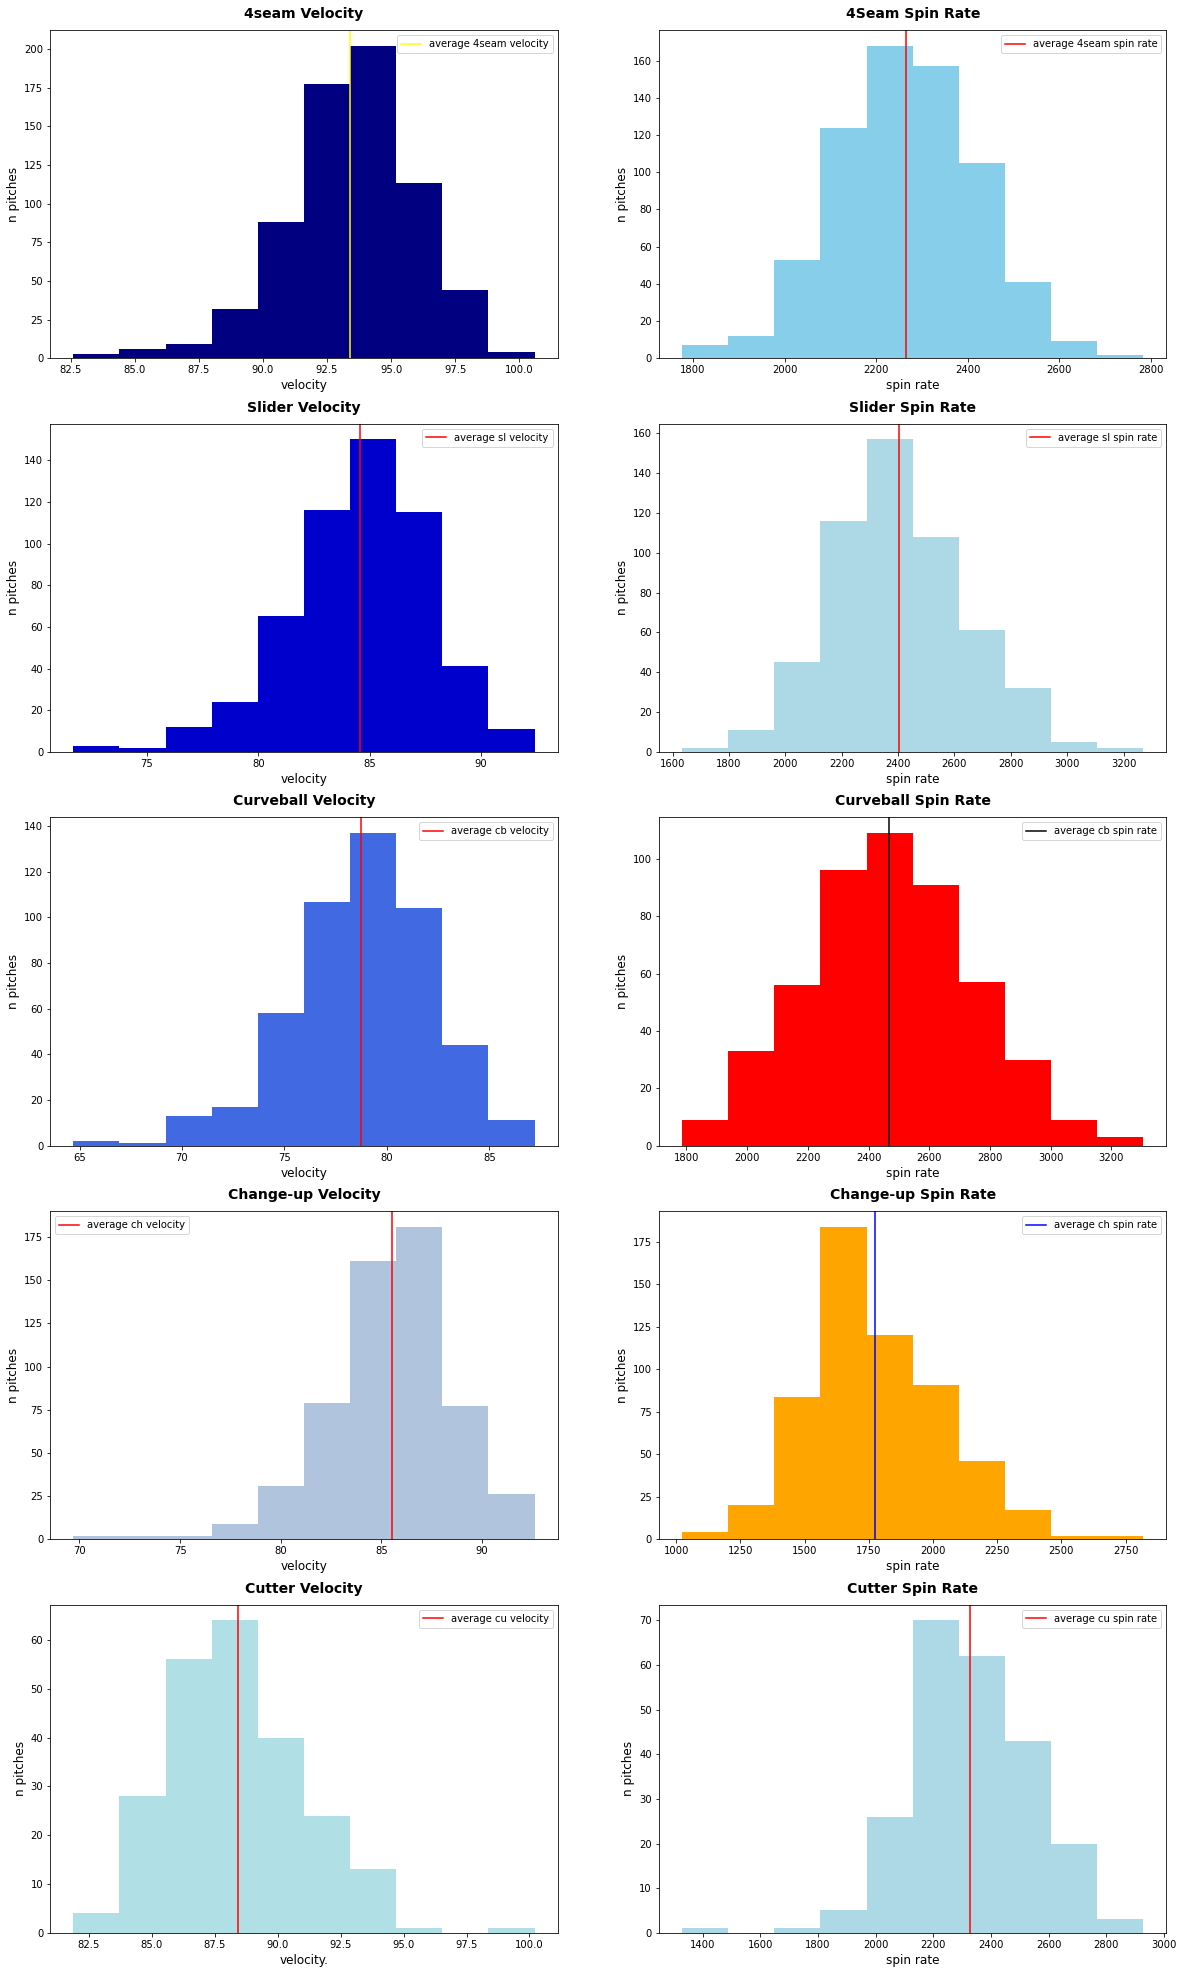

In [26]:
fig, ax = plt.subplots(5, 2, figsize = (20, 35))

ax[0][0].hist(df['4seam_velo'], color = 'navy')
ax[0][0].axvline(x = df['4seam_velo'].mean(), color = 'yellow', label = 'average 4seam velocity')
ax[0][0].set_xlabel('velocity', fontsize = 12)
ax[0][0].set_ylabel('n pitches', fontsize = 12)
ax[0][0].set_title('4seam Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[0][0].legend()

ax[0][1].hist(df['4seam_spinrate'], color = 'skyblue')
ax[0][1].axvline(x = df['4seam_spinrate'].mean(), color = 'r', label = 'average 4seam spin rate')
ax[0][1].set_xlabel('spin rate', fontsize = 12)
ax[0][1].set_ylabel('n pitches', fontsize = 12)
ax[0][1].set_title('4Seam Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[0][1].legend()

ax[1][0].hist(df['sl_velo'], color = 'mediumblue')
ax[1][0].axvline(x = df['sl_velo'].mean(), color = 'r', label = 'average sl velocity')
ax[1][0].set_xlabel('velocity', fontsize = 12)
ax[1][0].set_ylabel('n pitches', fontsize = 12)
ax[1][0].set_title('Slider Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[1][0].legend()

ax[1][1].hist(df['sl_spinrate'], color = 'lightblue')
ax[1][1].axvline(x = df['sl_spinrate'].mean(), color = 'r', label = 'average sl spin rate')
ax[1][1].set_xlabel('spin rate', fontsize = 12)
ax[1][1].set_ylabel('n pitches', fontsize = 12)
ax[1][1].set_title('Slider Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[1][1].legend()

ax[2][0].hist(df['cb_velo'], color = 'royalblue')
ax[2][0].axvline(x = df['cb_velo'].mean(), color = 'r', label = 'average cb velocity')
ax[2][0].set_xlabel('velocity', fontsize = 12)
ax[2][0].set_ylabel('n pitches', fontsize = 12)
ax[2][0].set_title('Curveball Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[2][0].legend()

ax[2][1].hist(df['cb_spinrate'], color = 'red')
ax[2][1].axvline(x = df['cb_spinrate'].mean(), color = 'k', label = 'average cb spin rate')
ax[2][1].set_xlabel('spin rate', fontsize = 12)
ax[2][1].set_ylabel('n pitches', fontsize = 12)
ax[2][1].set_title('Curveball Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[2][1].legend()

ax[3][0].hist(df['ch_velo'], color = 'lightsteelblue')
ax[3][0].axvline(x = df['ch_velo'].mean(), color = 'r', label = 'average ch velocity')
ax[3][0].set_xlabel('velocity', fontsize = 12)
ax[3][0].set_ylabel('n pitches', fontsize = 12)
ax[3][0].set_title('Change-up Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[3][0].legend()

ax[3][1].hist(df['ch_spinrate'], color = 'orange')
ax[3][1].axvline(x = df['ch_spinrate'].mean(), color = 'b', label = 'average ch spin rate')
ax[3][1].set_xlabel('spin rate', fontsize = 12)
ax[3][1].set_ylabel('n pitches', fontsize = 12)
ax[3][1].set_title('Change-up Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[3][1].legend()

ax[4][0].hist(df['cu_velo'], color = 'powderblue')
ax[4][0].axvline(x = df['cu_velo'].mean(), color = 'r', label = 'average cu velocity')
ax[4][0].set_xlabel('velocity.', fontsize = 12)
ax[4][0].set_ylabel('n pitches', fontsize = 12)
ax[4][0].set_title('Cutter Velocity', fontsize = 14, fontweight = 'bold', pad = 12)
ax[4][0].legend()

ax[4][1].hist(df['cu_spinrate'], color = 'lightblue')
ax[4][1].axvline(x = df['cu_spinrate'].mean(), color = 'r', label = 'average cu spin rate')
ax[4][1].set_xlabel('spin rate', fontsize = 12)
ax[4][1].set_ylabel('n pitches', fontsize = 12)
ax[4][1].set_title('Cutter Spin Rate', fontsize = 14, fontweight = 'bold', pad = 12)
ax[4][1].legend();

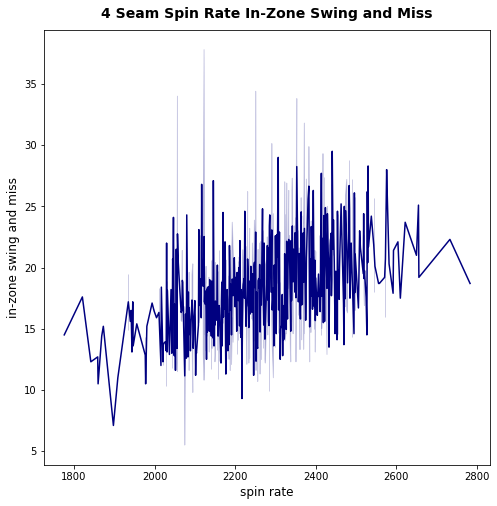

In [27]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['4seam_spinrate'],y = df['z_swing_miss%'], color = 'navy')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('4 Seam Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

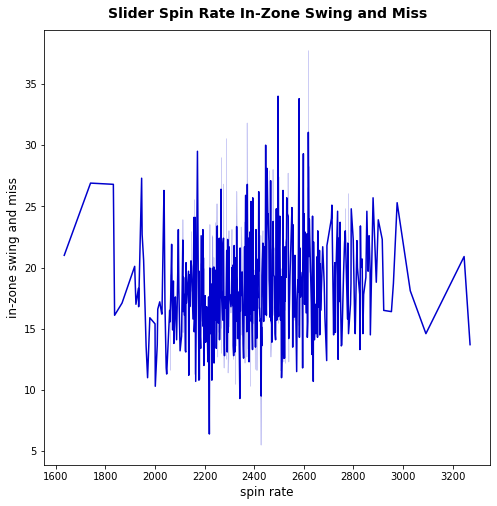

In [28]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['sl_spinrate'],y = df['z_swing_miss%'], color = 'mediumblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('Slider Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

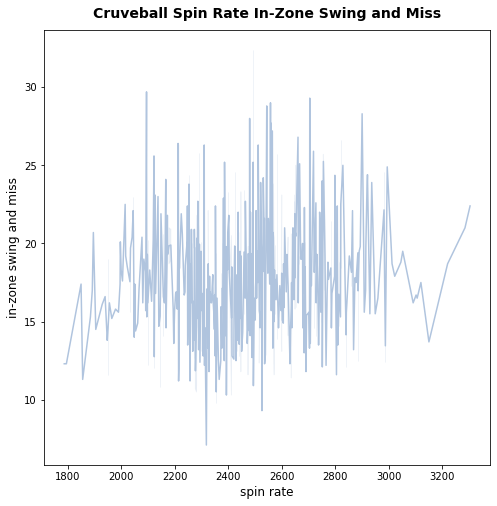

In [29]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['cb_spinrate'],y = df['z_swing_miss%'], color = 'lightsteelblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('Cruveball Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

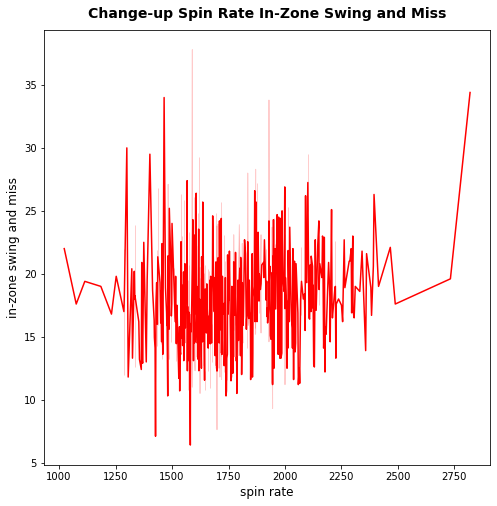

In [30]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['ch_spinrate'],y = df['z_swing_miss%'], color = 'red')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('Change-up Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

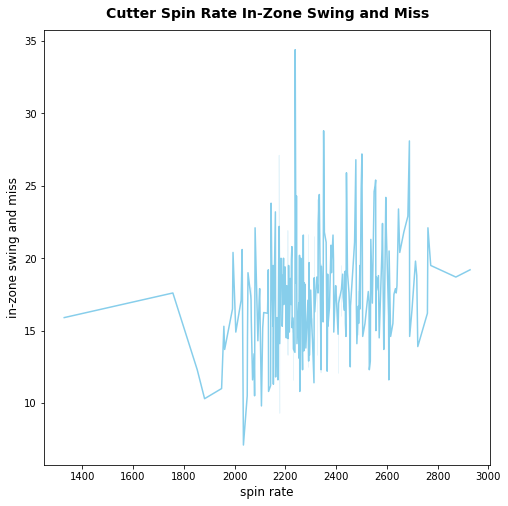

In [31]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['cu_spinrate'],y = df['z_swing_miss%'], color = 'skyblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('in-zone swing and miss', fontsize = 12)
plt.title('Cutter Spin Rate In-Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

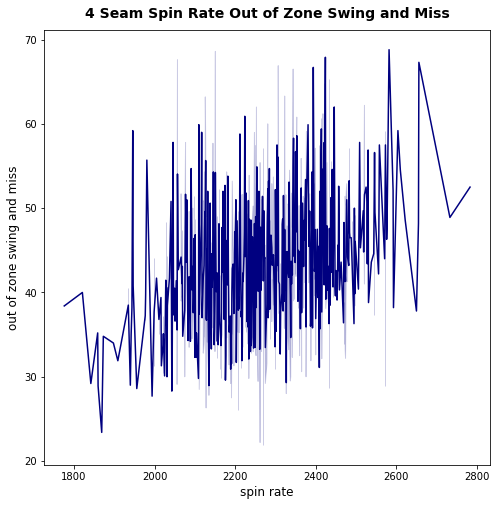

In [32]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['4seam_spinrate'],y = df['oz_swing_miss%'], color = 'navy')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('4 Seam Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

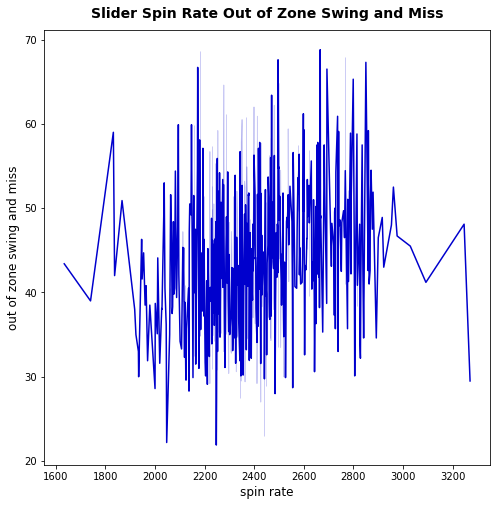

In [33]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['sl_spinrate'],y = df['oz_swing_miss%'], color = 'mediumblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('Slider Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

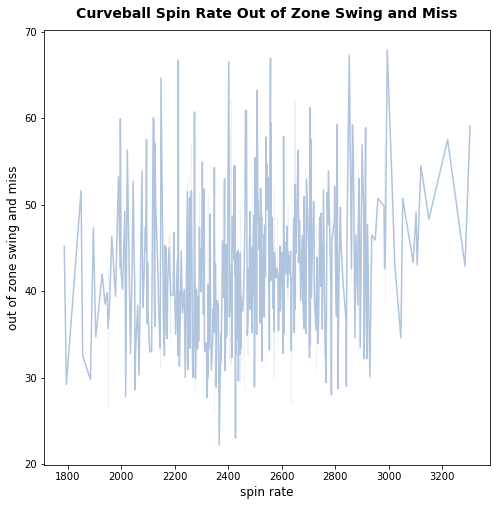

In [34]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['cb_spinrate'],y = df['oz_swing_miss%'], color = 'lightsteelblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('Curveball Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

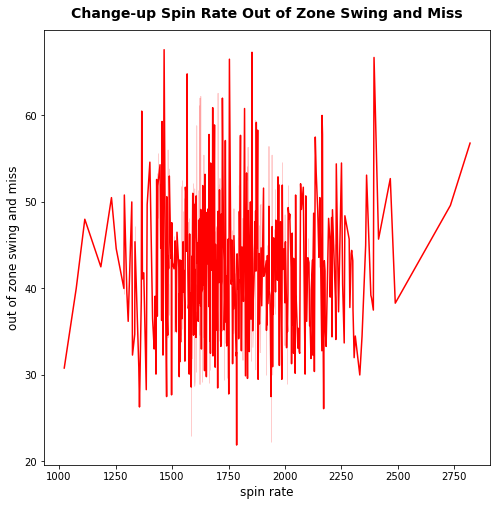

In [35]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['ch_spinrate'],y = df['oz_swing_miss%'], color = 'red')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('Change-up Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);

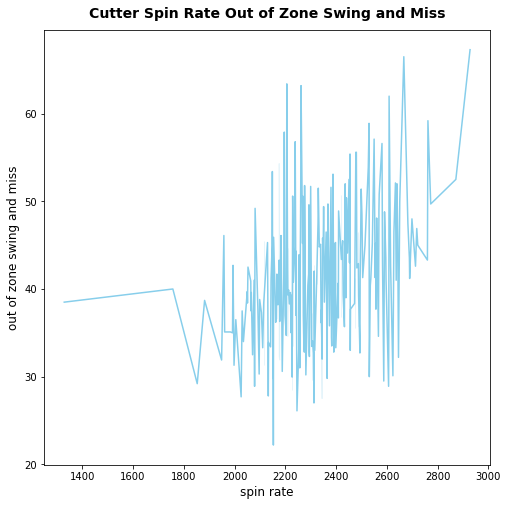

In [36]:
plt.figure(figsize = (8, 8))

sns.lineplot(x = df['cu_spinrate'],y = df['oz_swing_miss%'], color = 'skyblue')
plt.xlabel('spin rate', fontsize = 12)
plt.ylabel('out of zone swing and miss', fontsize = 12)
plt.title('Cutter Spin Rate Out of Zone Swing and Miss', fontsize = 14, fontweight = 'bold', pad = 12);